# Vectors EXPERT

Esta tabla contiene la información de las expresiones del tipo vector (Listas, diccionarios, etc).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'vector__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('vectors')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-05 11:13:40.813342 Data cache files found ...
2024-07-05 11:13:40.866383 Data cache files successfully loaded!!
The dataset contains 121764 (34.63%) instances for BEGINNER class and 229900 (65.37%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'vectors'
TABLE_FEATURES = ['vector__category', 'vector__number_of_elements', 'vector__homogeneous']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (229900, 3)
As we can see the downloaded data contains a total of 229900 instances. For each instance we have 3 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 229900 entries, 121764 to 351663
Data columns (total 3 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   vector__category            229900 non-null  object
 1   vector__number_of_elements  229900 non-null  int64 
 2   vector__homogeneous         229900 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 5.5+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 1 variables boleanas y 2 de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

vector__category              0
vector__number_of_elements    0
vector__homogeneous           0
dtype: int64

In [5]:
print_empty_cols(X)

vector__category
----------------
0 instancias no tienen un valor para la columna vector__category


vector__number_of_elements
--------------------------
0 instancias no tienen un valor para la columna vector__number_of_elements


vector__homogeneous
-------------------
0 instancias no tienen un valor para la columna vector__homogeneous




### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vector__category,229900,4,TupleLiteral,146517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vector__number_of_elements,229900.0,NaN,NaN,NaN,3.350879,63.908803,0.0,2.0,2.0,2.0,14519.0
vector__homogeneous,229900,2,True,129179,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "vector__number_of_elements": [(0.0, 2.0), (2.0, 2.0), (2.0, 3.0), (3.0, inf)], # min: 0 ; max: 14519
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['vector__number_of_elements'], 10))
print(get_statistics(full_table, ['vector__category'], 10))
print(get_statistics(X_copy, ['vector__homogeneous'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
vector__number_of_elements  count  percentage
                 [2.0_2.0] 133210   57.942584
                 [0.0_2.0)  48986   21.307525
                 [3.0_inf]  47704   20.749891

 vector__category  count  percentage
     TupleLiteral 146517   63.730753
      ListLiteral  49870   21.692040
DictionaryLiteral  32040   13.936494
       SetLiteral   1473    0.640713

 vector__homogeneous  count  percentage
                True 129179   56.189213
               False 100721   43.810787

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (229900, 6)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

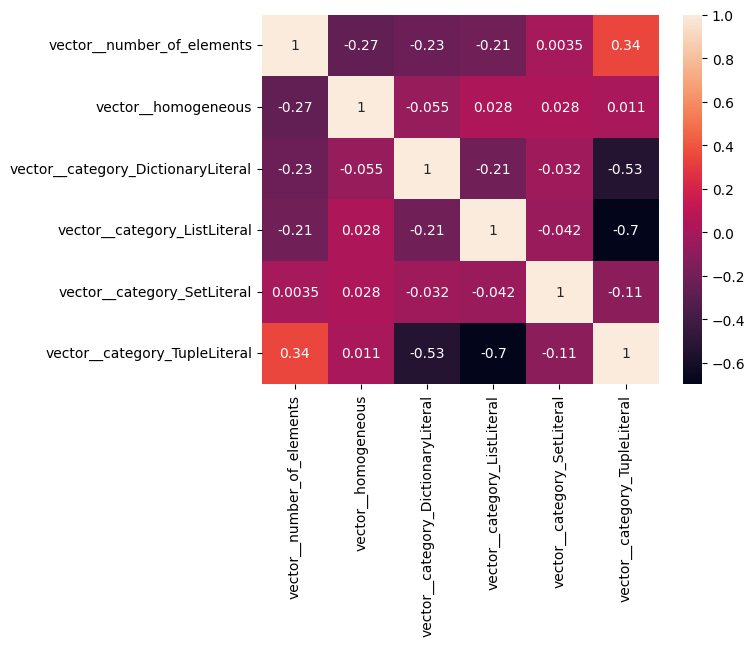

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica, 1 booleanas y 1 categorica) se hara un analisis detallado

### Variable homogeneous (1/3)
Esta variable es de tipo booleano y representa si todos los elementos de la lista son del mismo tipo.

<Axes: xlabel='vector__homogeneous', ylabel='Count'>

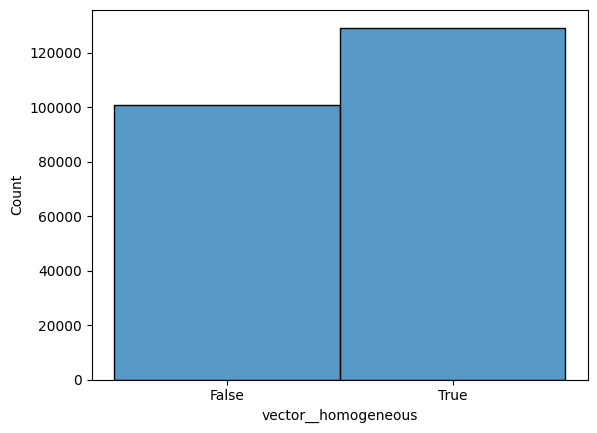

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['vector__homogeneous'], discrete=True)

In [11]:
num_true_values = len(X[X['vector__homogeneous'] == True])
num_false_values = len(X[X['vector__homogeneous'] == False])
std = X['vector__homogeneous'].std()
freq_true = len(X[X['vector__homogeneous'] == True]) / len(X['vector__homogeneous'])
freq_false = len(X[X['vector__homogeneous'] == False]) / len(X['vector__homogeneous'])
print(f'La variable homogeneous contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a False es {freq_false}.')

La variable homogeneous contiene 129179 valores verdaderos y 100721 valores falsos. Y, la desviación típica es de 0.49615564942359924
La frecuencia con la que programa puede tener la variable homogeneous a True es 0.5618921270117443.
La frecuencia con la que programa puede tener la variable homogeneous a False es 0.43810787298825576.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'vector__homogeneous', possible_values)

La variable vector__homogeneous contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable vector__homogeneous toma el valor de 1.0 en un 56.19% de los items.
La variable vector__homogeneous toma el valor de 0.0 en un 43.81% de los items.


In [13]:
X[X['vector__homogeneous'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,vector__number_of_elements,vector__homogeneous,vector__category_DictionaryLiteral,vector__category_ListLiteral,vector__category_SetLiteral,vector__category_TupleLiteral
count,129179.000000,129179.0,129179.000000,129179.000000,129179.000000,129179.000000
mean,2.522469,1.0,0.122473,0.227018,0.008376,0.642132
std,44.724453,0.0,0.327833,0.418906,0.091137,0.479375
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.0,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.0,0.000000,0.000000,0.000000,1.000000
max,5376.000000,1.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_elements (2/3)
Esta variable representa el número de elementos en la lista. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 14519. Con una media de 3.35.

<Axes: ylabel='vector__number_of_elements'>

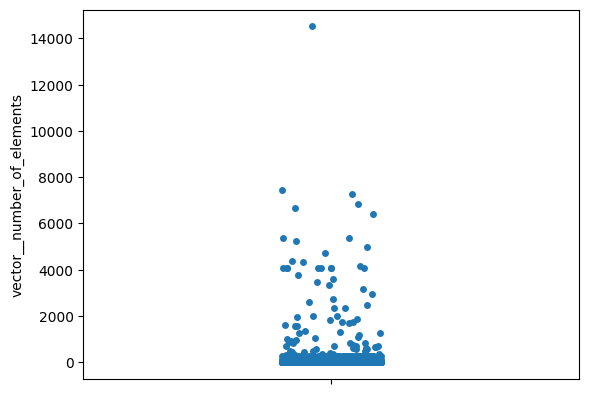

In [14]:
sns.stripplot(X['vector__number_of_elements'])

### IMPORTANTE
El valor maximo esta muy alejado de los siguientes

In [15]:
print_outliers_for_df_column(X, 'vector__number_of_elements')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9889054969697094
Rango valores atípicos extremos (Tukey): [2.0,2.0]
Rango valores atípicos leves (Tukey): [2.0,2.0]
Rango valores atípicos extremos (Fixed BoxPlot): [2.0,2.0]
-3.0IQR: 48986 instancias tienen un valor para vector__number_of_elements inferior a 2.0 (Q1-3*IQR) para vector__number_of_elements. Representando un 21.31% del total de instancias.
-1.5IQR: 48986 instancias tienen un valor para vector__number_of_elements inferior a 2.0 (Q1-1.5*IQR) para vector__number_of_elements. Representando un 21.31% del total de instancias.
+1.5IQR: 47704 instancias tienen un valor para vector__number_of_elements superior a 2.0 (Q3+1.5*IQR) para vector__number_of_elements. Representando un 20.75% del total de instancias.
+3.0IQR: 47704 instancias tienen un valor para vector__number_of_elements superior a 2.0 (Q3-3*IQR) para vector__number_of_elements. Representando un 20.75% del total de instancias.
L: 48986 instancias tienen un val

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 2 o menor que 2 (Todos los umbrales son 2)

In [16]:
X[(X['vector__number_of_elements'] > 2) | (X['vector__number_of_elements'] < 2)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,vector__number_of_elements,vector__homogeneous,vector__category_DictionaryLiteral,vector__category_ListLiteral,vector__category_SetLiteral,vector__category_TupleLiteral
count,96690.000000,96690.000000,96690.000000,96690.000000,96690.000000,96690.000000
mean,5.211987,0.453025,0.262985,0.392719,0.010042,0.334254
std,98.516052,0.497791,0.440257,0.488358,0.099708,0.471731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,14519.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable category (3/3)
Esta variable es de tipo categorica y representa el tipo del vector.

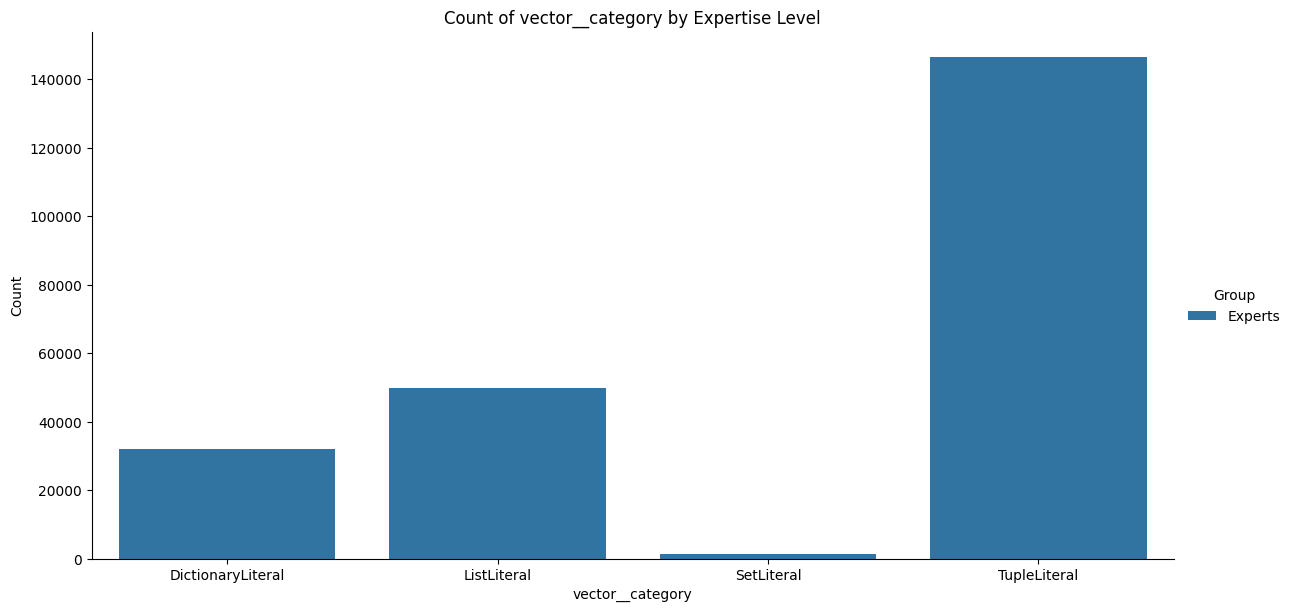

In [17]:
print_categorical_histogram(full_table, 'vector__category',TARGET_FEATURE, include_all=False, include_beginners=False)

In [18]:
print_frequency_anal_for_cat_var(full_table, 'vector__category')

La variable vector__category contiene 4 valores distintos.
El umbral de outlier es de 0.05%
La variable vector__category toma el valor de TupleLiteral en un 63.73% de los items.
La variable vector__category toma el valor de ListLiteral en un 21.69% de los items.
La variable vector__category toma el valor de DictionaryLiteral en un 13.94% de los items.
La variable vector__category toma el valor de SetLiteral en un 0.6407% de los items.


In [19]:
print_values_usage_for_cat_var(full_table, 'vector__category', VECTOR_CATEGORY_VALUES)

La variable vector__category puede tomar 4 valores distintos
	4 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [20]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,vector__category,vector__number_of_elements,vector__homogeneous,vector__expertise_level
127910,ListLiteral,2965,True,EXPERT
131937,TupleLiteral,198,True,EXPERT
132166,DictionaryLiteral,253,True,EXPERT
134712,TupleLiteral,4096,True,EXPERT
134713,TupleLiteral,256,True,EXPERT
...,...,...,...,...
280945,ListLiteral,2736,True,EXPERT
282065,DictionaryLiteral,1000,True,EXPERT
315723,SetLiteral,25,True,EXPERT
321792,SetLiteral,22,True,EXPERT


### IMPORTANTE
Revisar los outliers detectados.

In [21]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
vector__number_of_elements,276.0,813.105103,1639.016357,20.0,83.0,256.0,522.0,14519.0
vector__homogeneous,276.0,0.594203,0.491938,0.0,0.0,1.0,1.0,1.0
vector__category_DictionaryLiteral,276.0,0.394928,0.489723,0.0,0.0,0.0,1.0,1.0
vector__category_ListLiteral,276.0,0.043478,0.204302,0.0,0.0,0.0,0.0,1.0
vector__category_SetLiteral,276.0,0.036232,0.187206,0.0,0.0,0.0,0.0,1.0
vector__category_TupleLiteral,276.0,0.525362,0.500263,0.0,0.0,1.0,1.0,1.0


In [22]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
vector__number_of_elements,229624.0,2.377583,9.106022,0.0,2.0,2.0,2.0,4096.0
vector__homogeneous,229624.0,0.561853,0.496161,0.0,0.0,1.0,1.0,1.0
vector__category_DictionaryLiteral,229624.0,0.139058,0.346008,0.0,0.0,0.0,0.0,1.0
vector__category_ListLiteral,229624.0,0.217129,0.412292,0.0,0.0,0.0,0.0,1.0
vector__category_SetLiteral,229624.0,0.006371,0.079566,0.0,0.0,0.0,0.0,1.0
vector__category_TupleLiteral,229624.0,0.637442,0.480740,0.0,0.0,1.0,1.0,1.0
